In [1]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import time
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import itertools
import joblib

In [2]:
# load the data
data = pd.read_csv('data.csv')

In [3]:
# load the data
new_df = pd.read_csv('new_df.csv')

In [4]:
# load the data
df_test_over = pd.read_csv('df_test_over.csv')

In [5]:
# function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
# split the undersampled data into train and test sets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(new_df.drop('Class', axis=1), new_df['Class'], test_size=0.2, random_state=42)

In [7]:
# instantiate and train the model
lr_under = LogisticRegression()
lr_under.fit(X_train_under,y_train_under)
ylr_under_pred = lr_under.predict(X_test_under)

acuuracy_score = accuracy_score(ylr_under_pred,y_test_under)

print("\n========= Under Sampled Data Accuracy using Logistic Regression ==============\n")

print("Accuracy Score ",acuuracy_score) 
print ("\n =====Confusion Matrix ======\n")


========= Under Sampled Data Accuracy using Logistic Regression ==============

Accuracy Score  0.9421052631578948

 =====Confusion Matrix ======



Confusion matrix
[[94  7]
 [ 4 85]]
Confusion matrix
[[98  0]
 [ 0 92]]


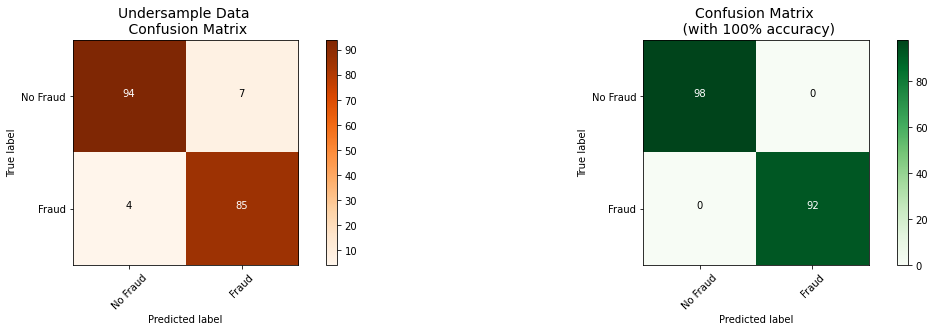

In [8]:
# Plot the confusion matrix
lr_cm_under = confusion_matrix(ylr_under_pred,y_test_under)
actual_cm = confusion_matrix(y_test_under, y_test_under)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(lr_cm_under, labels, title="Undersample Data \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The plot for LogisticRegression UnderSampled Data shows good results but still has some false predictions.

In [9]:
# split the oversample dataset.
y_over = df_test_over['Class']
X_over = df_test_over.drop('Class', axis = 1)

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, test_size = 0.20, random_state = 42)

In [10]:
# instantiate and train the model
lr_over = LogisticRegression()
lr_over.fit(X_train_over,y_train_over)
ylr_over_pred = lr_over.predict(X_test_over)

print("\n========= Over Sampled Data Accuracy using Logistic Regression ==============\n")

print("Accuracy Score ",accuracy_score(ylr_over_pred,y_test_over))
print ("\n =====Confusion Matrix ======\n")


========= Over Sampled Data Accuracy using Logistic Regression ==============

Accuracy Score  0.9507764275539454

 =====Confusion Matrix ======



Confusion matrix
[[55529  4381]
 [ 1217 52599]]
Confusion matrix
[[56746     0]
 [    0 56980]]


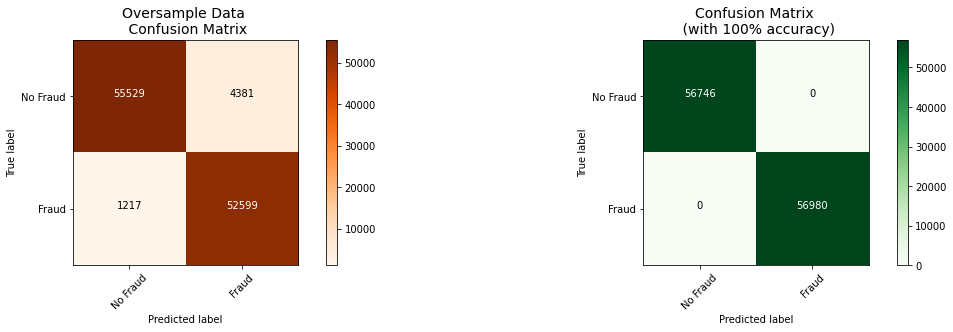

In [11]:
# Plot the confusion matrix
lr_cm_over = confusion_matrix(ylr_over_pred, y_test_over)
actual_cm = confusion_matrix(y_test_over, y_test_over)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(lr_cm_over, labels, title="Oversample Data \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### The plot for LogisticRegression OverSampled Data shows some variance because there are 1000-5000 data points that it could not classify properly.

In [12]:
# Model saved
filename = "lr_under.joblib"
joblib.dump(lr_under, filename)

['lr_under.joblib']

In [13]:
# Model saved
filename = "lr_over.joblib"
joblib.dump(lr_over, filename)

['lr_over.joblib']